In [6]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
%matplotlib inline

(2, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
(0.8165926535897944, array([24.26636454, 24.21483128]), array([42.75349429, 43.89289098]))


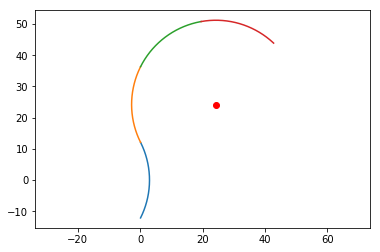

In [74]:
# bi-state 0 = bend to left
# bi_state 1 = bend to right
# COA = central point of actuator 

def f(n, radius = 27, bi_states = [1, 0, 0, 0], arc_angle = 0.93, COA = [0, 0]): 
    "2D plot of series linked, bistable actuators"
    
    numsegments = 1000
    x = 0
    y = 1
    
    # the actuator centre is atthe midpoint of the chord of the first (vertically alligned) link
    state = bi_states[n-1]
    
    
    if n == 1:        
        # define the angle of start of arc relative to horizontal datum
        start_angle = 0 - (arc_angle / 2) 
        
        # define the origin of the arc
        sagitta = radius * (1 - np.cos(arc_angle / 2))
        origin = np.array(COA)
        origin[x] += (radius - sagitta) * (-1 if state else 1) 
        
    
    else:            
        # define the angle of start of arc relative to horizontal datum
        start_angle, origin, start_point = f(n-1)
        
        # if the bistable state is not same as previous link ... 
        if bi_states[n-1]!=bi_states[n-2]:
            # mirror location of the origin of the arc
            origin = start_point + np.array([radius * np.cos(start_angle),
                                             radius * np.sin(start_angle)])
            
            # invert sign of angle that end_point-origin makes with horizontal datum
            start_angle *= -1
            

    # plot link as arc
    arc_points = np.linspace(start_angle, 
                             start_angle + arc_angle, 
                             numsegments)    

    arc = np.array([origin[x] + radius * (np.cos(arc_points) * (1 if state else -1)), 
                    origin[y] + radius *  np.sin(arc_points)])
    
    print(arc.shape)
    
    plt.plot(arc[x], arc[y])

    # angle that end_point-origin makes with horizontal datum 
    start_angle = np.arcsin(abs(arc[y, -1] - origin[y]) / radius) 
    end_point = arc[:, -1]
    return start_angle, origin, end_point
    
    
    
    
#     arc[y] = (origin[y] + radius) * np.sin(arc_points)
#     arc[0] =  np.linspace(start_angle, 
#                              start_angle + arc_angle, 
#                              numsegments)
    
#     arc[x] = origin[x] + radius #* (np.cos(arc_points) * (1 if state else -1))
    

    


#     arc_y = origin[y] + radius * np.sin(arc_points)
    
#     if state:
#         arc_x = origin[x] + radius * np.cos(arc_points)
#     else: 
#         arc_x = origin[x] - radius * np.cos(arc_points)

#     plt.plot(arc_x, arc_y)

#     # the angle the end of the arc makes with the horizontal datum 
#     theta = np.arcsin(abs(arc_y - origin[y]) / radius)        
#     return theta  # This doesn't call f, so it breaks out of the recursion loop
            
        
        
            
        
F = f(4)        
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.axis('equal')        
print(F)    
        
        
        
        
        
        
        
        
        